In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [27]:
#Data Cload
df=pd.read_csv('/content/sample_data/ElectricCarData_Norm.csv')
df

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5 sec,160 km/h,330 km,191 Wh/km,440 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5 sec,210 km/h,335 km,258 Wh/km,540 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9 sec,200 km/h,325 km,194 Wh/km,440 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1 sec,200 km/h,375 km,232 Wh/km,450 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,65000


In [28]:
df.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [3]:
df.columns

Index(['Brand', 'Model', 'Accel', 'TopSpeed', 'Range', 'Efficiency',
       'FastCharge', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle',
       'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [4]:
df.shape

(103, 14)

In [5]:
df.describe()

,Seats,PriceEuro
count,103.000000,103.000000
mean,4.883495,55811.563107
std,0.795834,34134.665280
min,2.000000,20129.000000
25%,5.000000,34429.500000
50%,5.000000,45000.000000
75%,5.000000,65000.000000
max,7.000000,215000.000000


In [29]:
df.isnull().sum()

Brand          0
Model          0
Accel          0
TopSpeed       0
Range          0
Efficiency     0
FastCharge     0
RapidCharge    0
PowerTrain     0
PlugType       0
BodyStyle      0
Segment        0
Seats          0
PriceEuro      0
dtype: int64

In [30]:
df['TopSpeed']=df['TopSpeed'].str.replace('km/h', '', regex=False)
df['Range']=df['Range'].str.replace('km', '', regex=False)
df['FastCharge']=df['FastCharge'].str.replace('km/h', '', regex=False)
df['Efficiency']=df['Efficiency'].str.replace('Wh/km', '', regex=False)
df['Accel']=df['Accel'].str.replace('sec', '', regex=False)

In [32]:
df.replace('-', '', inplace=True)
numeric_columns = ['Accel', 'TopSpeed', 'Range', 'Efficiency', 'FastCharge', 'Seats', 'PriceEuro']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)
for col in numeric_columns:
    df[col] = df.groupby('Brand')[col].transform(lambda x: x.fillna(x.mean()))


In [33]:
df['FastCharge'].fillna(df['FastCharge'].mean(), inplace=True)

# Verify that there are no more NaN values
nan_counts_after = df.isnull().sum()
print("NaN counts after handling:\n", nan_counts_after)

NaN counts after handling:
 Brand          0
Model          0
Accel          0
TopSpeed       0
Range          0
Efficiency     0
FastCharge     0
RapidCharge    0
PowerTrain     0
PlugType       0
BodyStyle      0
Segment        0
Seats          0
PriceEuro      0
dtype: int64


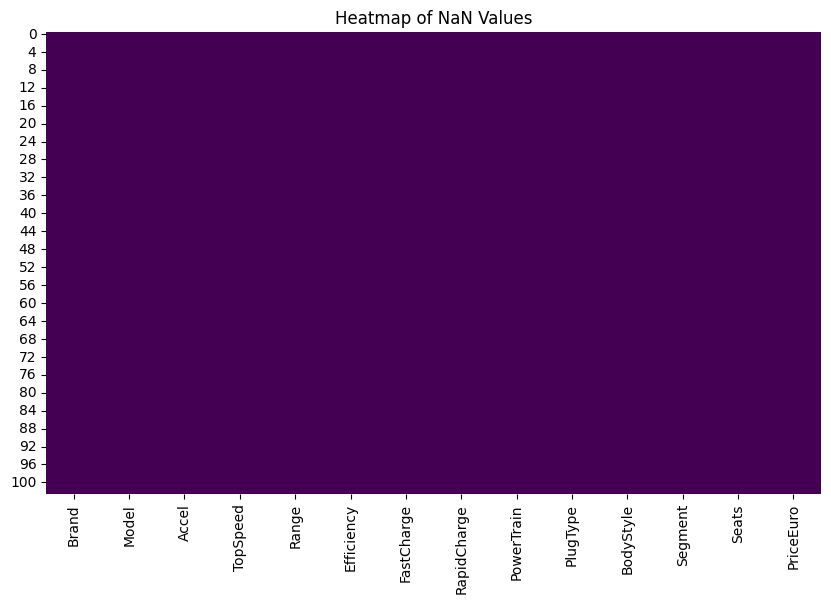

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of NaN Values')
plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify numerical and categorical columns
#numerical_features = ['Accel', 'TopSpeed', 'Range', 'Efficiency', 'FastCharge', 'Seats', 'PriceEuro']

categorical_columns = ['Brand', 'Model', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment', 'RapidCharge']
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Normalize numerical variables
numerical_columns = ['Accel', 'TopSpeed', 'Range', 'Efficiency', 'FastCharge', 'Seats', 'PriceEuro']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the processed data
print(df.head())

   Brand  Model     Accel  TopSpeed     Range  Efficiency  FastCharge  \
0     30     46 -0.931186  1.240881  0.886862   -0.957247    2.466110   
1     31     33  0.867167 -0.442660 -0.548531   -0.753325   -1.022237   
2     23      0 -0.897883  0.710450  0.488142   -0.277506    0.848326   
3      2    101 -0.198524  0.018584  0.169166    0.572171    0.544991   
4      9     78  0.700653 -0.788593 -1.345971   -0.719338   -1.325572   

   RapidCharge  PowerTrain  PlugType  BodyStyle  Segment     Seats  PriceEuro  
0            1           0         2          7        3  0.147109  -0.009761  
1            1           2         2          1        2  0.147109  -0.759866  
2            1           0         2          2        3  0.147109   0.018501  
3            1           2         2          6        3  0.147109   0.359993  
4            1           2         2          1        1 -1.115578  -0.671638  


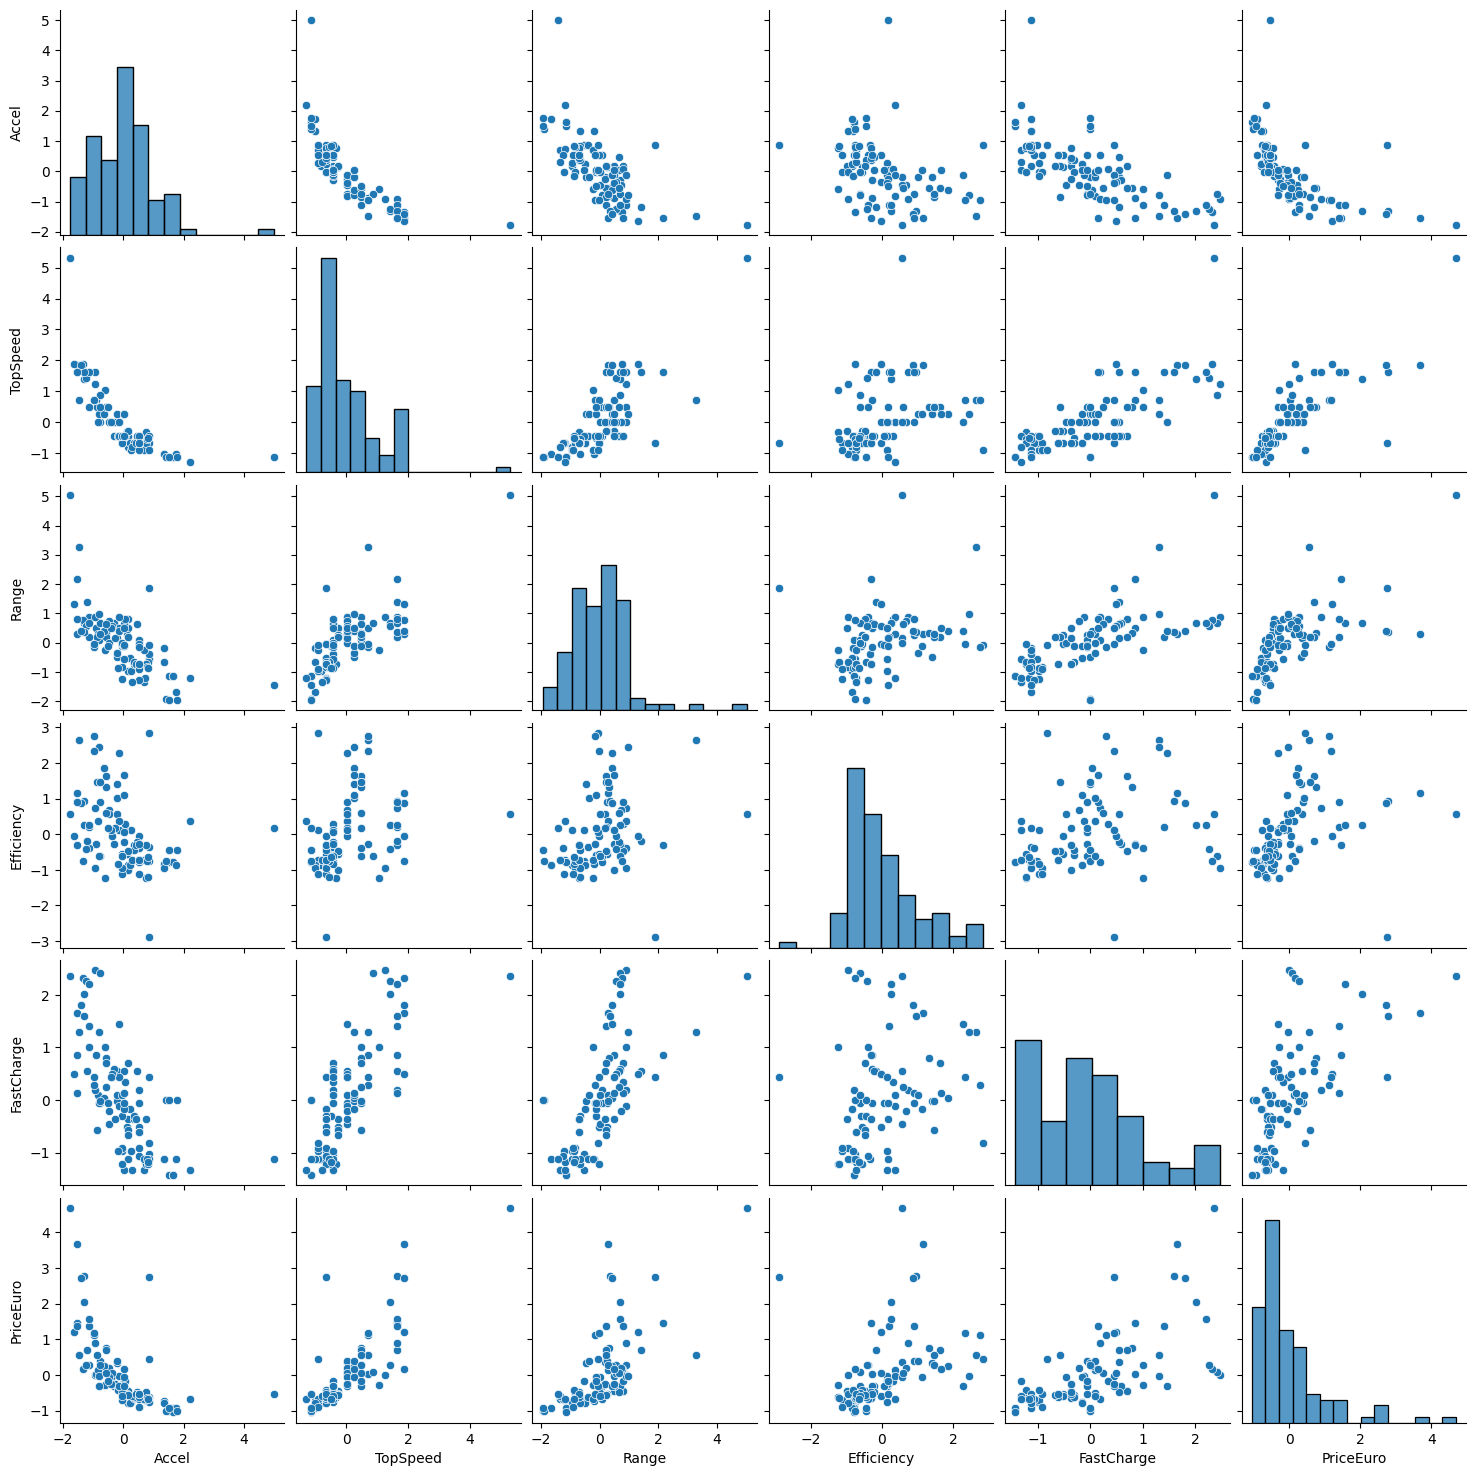

                Brand     Model     Accel  TopSpeed     Range  Efficiency  \
Brand        1.000000 -0.401572  0.062730  0.101759  0.088316   -0.195901   
Model       -0.401572  1.000000 -0.050635  0.067814 -0.066035    0.010976   
Accel        0.062730 -0.050635  1.000000 -0.786195 -0.677062   -0.382904   
TopSpeed     0.101759  0.067814 -0.786195  1.000000  0.746662    0.355675   
Range        0.088316 -0.066035 -0.677062  0.746662  1.000000    0.313077   
Efficiency  -0.195901  0.010976 -0.382904  0.355675  0.313077    1.000000   
FastCharge   0.182637 -0.032473 -0.685006  0.760380  0.666324    0.308895   
RapidCharge -0.188137  0.144293 -0.514820  0.251054  0.401290    0.105673   
PowerTrain   0.056464 -0.007609  0.521011 -0.560538 -0.451495   -0.394721   
PlugType    -0.231104  0.023750 -0.259657 -0.010110  0.131297   -0.028761   
BodyStyle   -0.275860  0.261255 -0.347164  0.339230  0.227477    0.373146   
Segment     -0.002040  0.068414 -0.451568  0.670403  0.628597    0.623263   

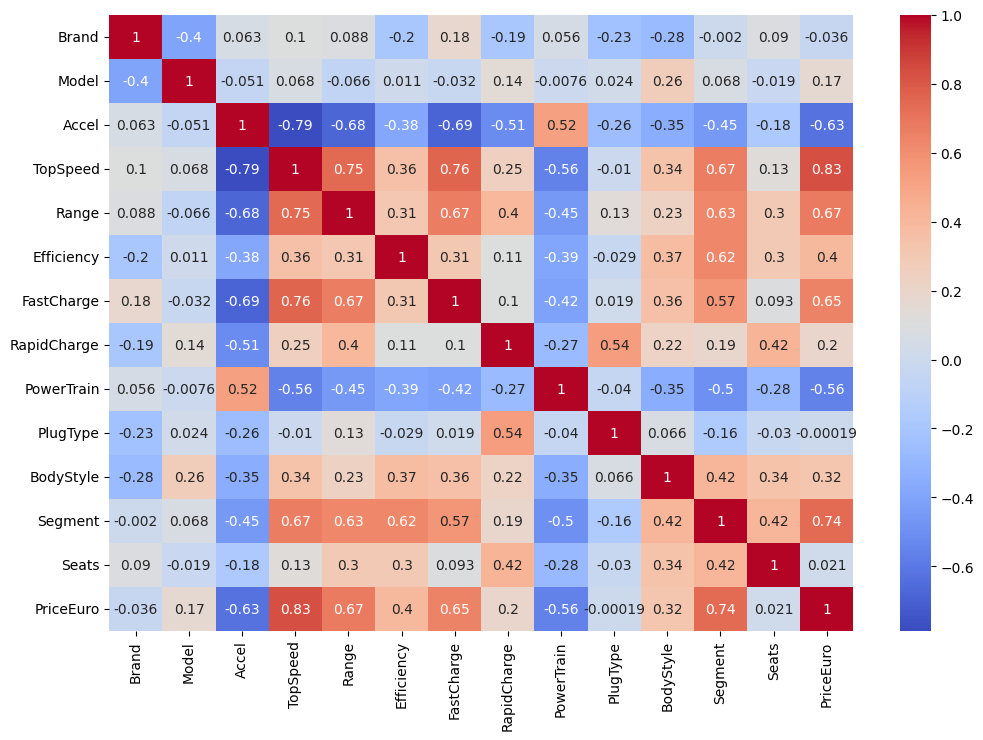

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for visualizing relationships
sns.pairplot(df[['Accel', 'TopSpeed', 'Range', 'Efficiency', 'FastCharge', 'PriceEuro']])
plt.show()

# Correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

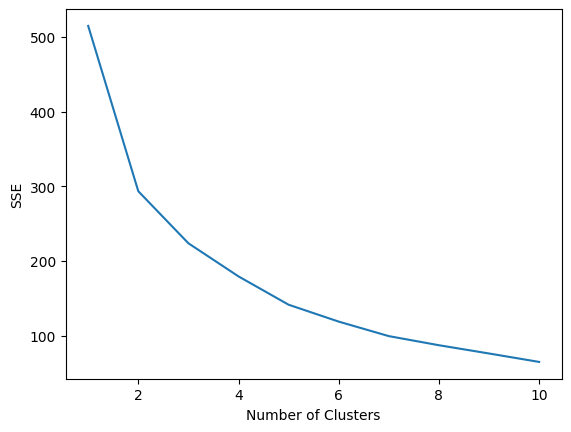

In [37]:
features = df[['Range', 'TopSpeed', 'Efficiency', 'PriceEuro', 'Accel']]
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [38]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


             Brand      Model     Accel  TopSpeed     Range  Efficiency  \
cluster                                                                   
0        19.076923  50.557692  0.708979 -0.691466 -0.596837   -0.633717   
1        14.108108  50.027027 -0.478448  0.259179  0.343741    0.693422   
2        24.714286  54.214286 -1.368881  1.883328  1.308366    0.521190   

         FastCharge  RapidCharge  PowerTrain  PlugType  BodyStyle   Segment  \
cluster                                                                       
0         -0.681317     0.903846    1.288462  1.923077   2.923077  1.519231   
1          0.446612     1.000000    0.540541  2.000000   5.162162  3.243243   
2          1.350272     1.000000    0.000000  1.714286   5.500000  5.071429   

            Seats  PriceEuro  
cluster                       
0       -0.265692  -0.584240  
1        0.385996   0.138899  
2       -0.033275   1.802943  


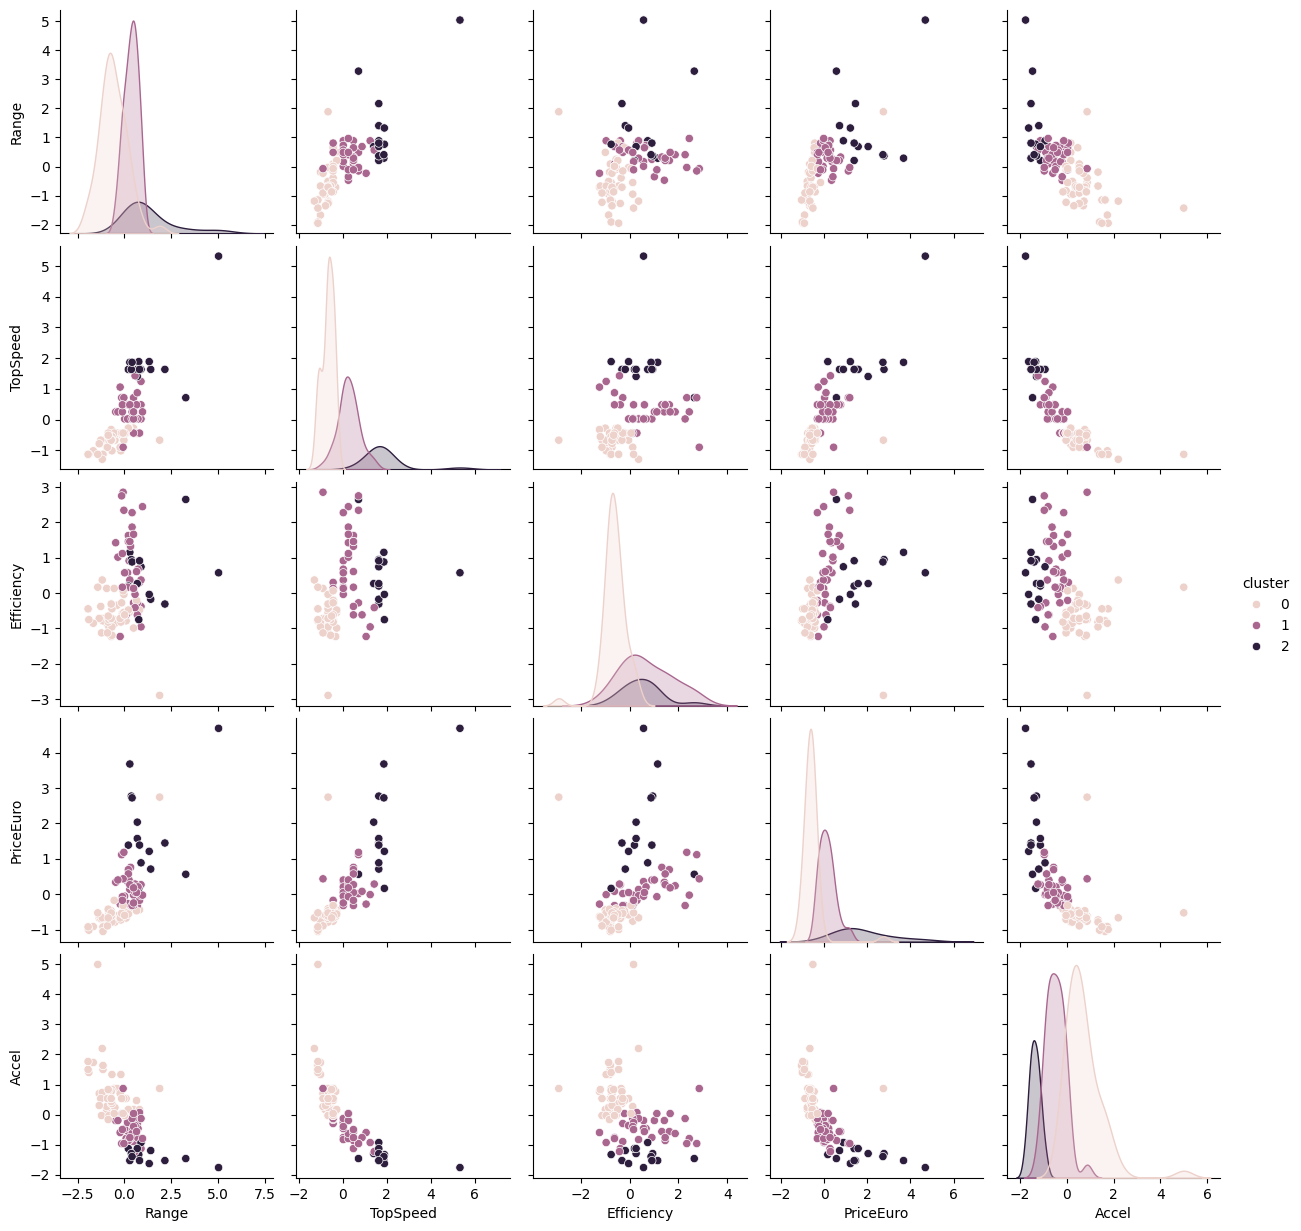

In [39]:
segment_analysis = df.groupby('cluster').mean()
print(segment_analysis)
sns.pairplot(df, hue='cluster', vars=['Range', 'TopSpeed', 'Efficiency', 'PriceEuro', 'Accel'])
plt.show()

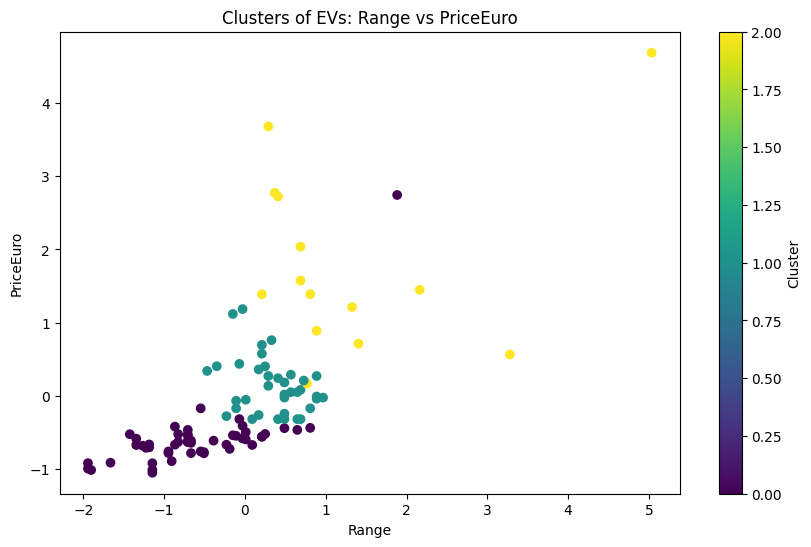

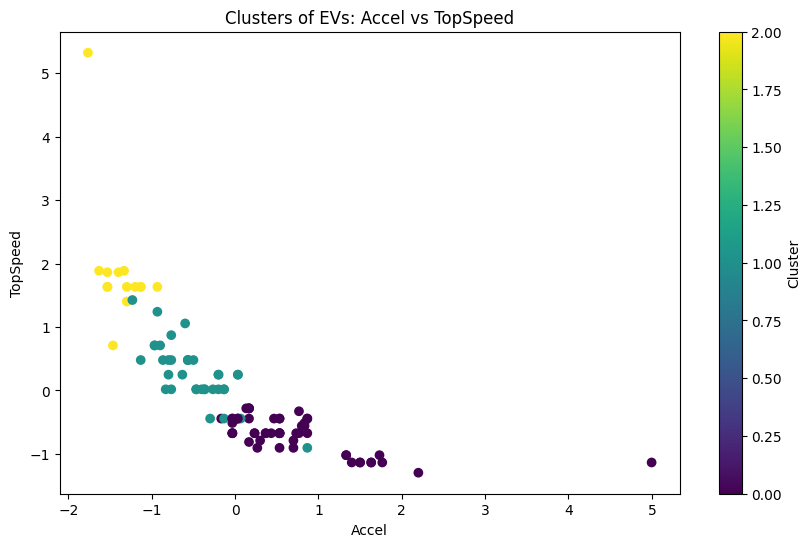

In [40]:
import matplotlib.pyplot as plt

# Scatter plot for Range vs PriceEuro
plt.figure(figsize=(10, 6))
plt.scatter(df['Range'], df['PriceEuro'], c=df['cluster'], cmap='viridis')
plt.xlabel('Range')
plt.ylabel('PriceEuro')
plt.title('Clusters of EVs: Range vs PriceEuro')
plt.colorbar(label='Cluster')
plt.show()

# Scatter plot for Accel vs TopSpeed
plt.figure(figsize=(10, 6))
plt.scatter(df['Accel'], df['TopSpeed'], c=df['cluster'], cmap='viridis')
plt.xlabel('Accel')
plt.ylabel('TopSpeed')
plt.title('Clusters of EVs: Accel vs TopSpeed')
plt.colorbar(label='Cluster')
plt.show()

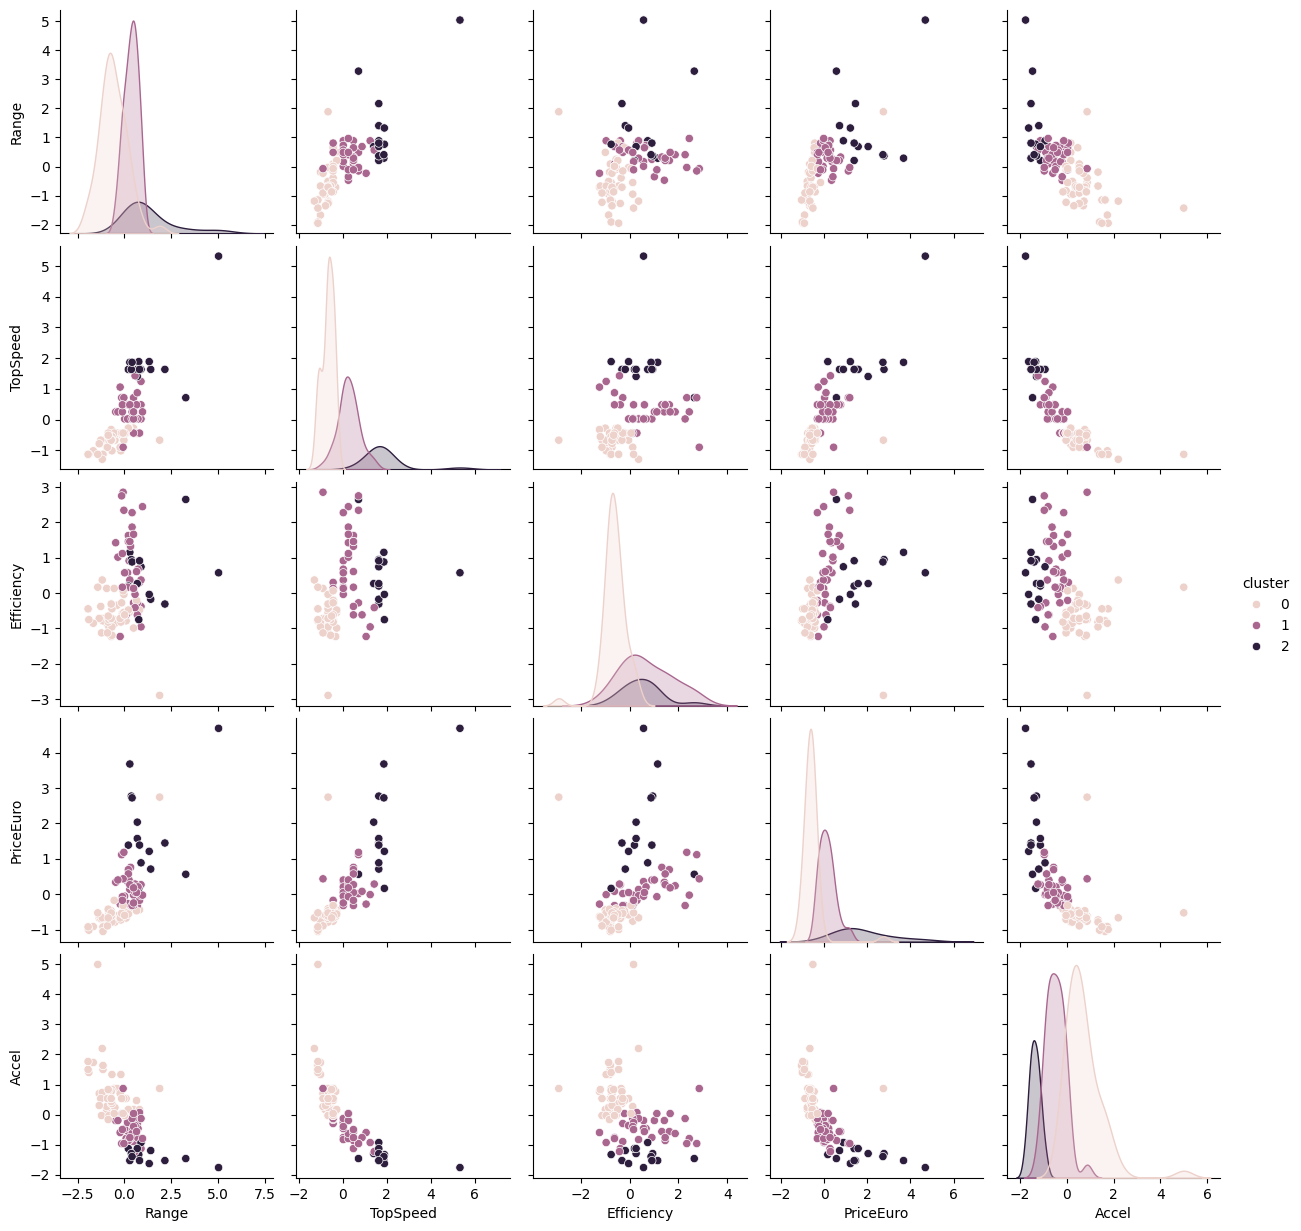

In [ ]:
import seaborn as sns

# Pairplot for selected features
sns.pairplot(df, hue='cluster', vars=['Range', 'TopSpeed', 'Efficiency', 'PriceEuro', 'Accel'])
plt.show()

In [50]:
features = df[['Range', 'TopSpeed', 'Efficiency', 'PriceEuro', 'Accel']]
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(features)

# Step 6: Develop Marketing Strategies
# Segment analysis
segment_analysis = df.groupby('cluster').mean()

# Segment 0: Performance Enthusiasts
segment_0_customers = df[df['cluster'] == 0]
print("Segment 0: Performance Enthusiasts")
print(segment_0_customers.head())  # Display sample customers for Segment 0
# Implement marketing strategies targeting performance enthusiasts
# Example: Highlight high-speed capabilities and long-range, engage with automotive enthusiasts, offer test drives.

# Segment 1: Budget-Conscious Consumers
segment_1_customers = df[df['cluster'] == 1]
print("Segment 1: Budget-Conscious Consumers")
print(segment_1_customers.head())  # Display sample customers for Segment 1
# Implement marketing strategies targeting budget-conscious consumers
# Example: Emphasize affordability and low operating costs, offer financing options.

# Segment 2: Premium Customers
segment_2_customers = df[df['cluster'] == 2]
print("Segment 2: Premium Customers")
print(segment_2_customers.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Segment 0: Performance Enthusiasts
    Brand  Model     Accel  TopSpeed     Range  Efficiency  FastCharge  \
1      31     33  0.867167 -0.442660 -0.548531   -0.753325   -1.022237   
4       9     78  0.700653 -0.788593 -1.345971   -0.719338   -1.325572   
6      31     83  0.733956 -0.673282 -1.186483   -0.719338   -1.173905   
7      22     81  0.234413 -0.673282 -0.508659   -0.855286   -0.162790   
11     20     39  0.167808 -0.811655 -0.947251   -0.855286   -1.123349   

    RapidCharge  PowerTrain  PlugType  BodyStyle  Segment     Seats  \
1             1           2         2          1        2  0.147109   
4             1           2         2          1        1 -1.115578   
6             1           1         2          1        2  0.147109   
7             1           1         2          1        1  0.147109   
11            1           1         3          1        2  0.147109   

    PriceEuro  cluster  
1   -0.759866        0  
4   -0.671638        0  
6   -0.703932     

In [42]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df[numerical_columns], df['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3127696807435305
